Import the tidyverse.

In [5]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3)

# Bars

Let's use the "diamonds" data set. Preview the first five rows of the diamonds dataset using the `head` function.  
(*Hint: try* `?head` *to get the help page for the* `head` *function*)

Make a bar chart of the "cut" column. About how many rows are there for the cut category "Ideal"?

Use `coord_flip` to rotate the chart by 90 degrees. 

# Lines

We'll use flight data from the Bureau of Transportation Statistics
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

In [2]:
# uncomment the following:

# library(nycflights13)
# flight.data = flights %>%
#     group_by(month, carrier, year) %>%
#     summarize(N_flights = n()) %>%
#     filter(carrier %in% c('UA', 'AA', 'US'))

What are the columns in `flight.data`? (*Hint: preview the table*)

First, make a bar chart of the `carrier` column? Does this make sense?

Plot month versus number of flights grouped according to carrier.

# Smooth

Plot a scatter plot (`geom_point`) of carat versus price with the diamonds dataset.

There is a lot of overplotting in this figure. Make the same plot but use the `alpha` value to reduce
the opacity of the points.  
(*Hint: alpha values can be set from 0 (transparent) to 1 (opaque)*)

Facetting can also help with overplotting. Facet the chart by `cut`.

In [ ]:
# options(repr.plot.width=7, repr.plot.height=6)

Add a `geom_smooth` to your facetted plot to emphasize the trend in the data.

# Tiles

This is a dataset of otter skull morphology.

In [6]:
# uncomment the following:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
     gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

species,museum,accession,characteristic,value
<fct>,<fct>,<fct>,<chr>,<dbl>
A. cinerea,AMNH,101458,m1,15.100
A. cinerea,AMNH,101461,m1,12.740
A. cinerea,AMNH,101466,m1,12.425
A. cinerea,AMNH,101635,m1,13.400
A. cinerea,AMNH,101459,m1,14.400
A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

.
       AMNH       Burke Smithsonian        TAMU 
        216         594          72          18 

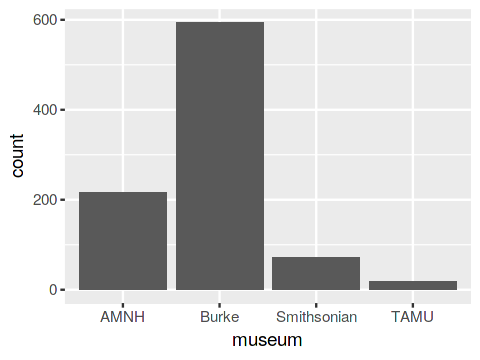

In [7]:
options(repr.plot.width=4, repr.plot.height=3)
p=ggplot(otter.data,aes(x=museum))
p=p+geom_bar()
p
otter.data$museum %>% table

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

In [18]:
# uncomment this to get a scaled version of the data:

otter.data.scaled = otter.data %>%
     group_by(characteristic) %>%
     mutate(value.scaled = scales::rescale(value))

otter.data.scaled %>% head

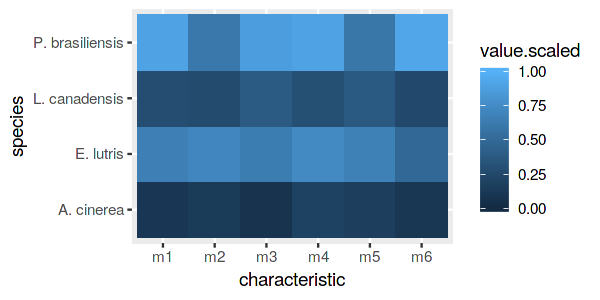

In [21]:
options(repr.plot.width=5, repr.plot.height=2.5)

p = ggplot(otter.data.scaled, aes(x = characteristic, y = species, fill = value.scaled))

p = p + geom_tile()

p

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

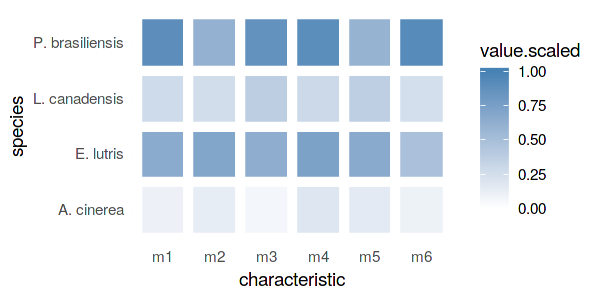

In [31]:
options(repr.plot.width=5, repr.plot.height=2.5)

p = ggplot(otter.data.scaled, aes(x = characteristic, y = species, fill = value.scaled))

p = p + geom_tile(color='white',lwd=2) #lwd is line width
p = p+scale_fill_gradient(low="white", high="steelblue")
p = p+theme_minimal() # take away axes
# can add base_size argument in theme minimal
p

# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


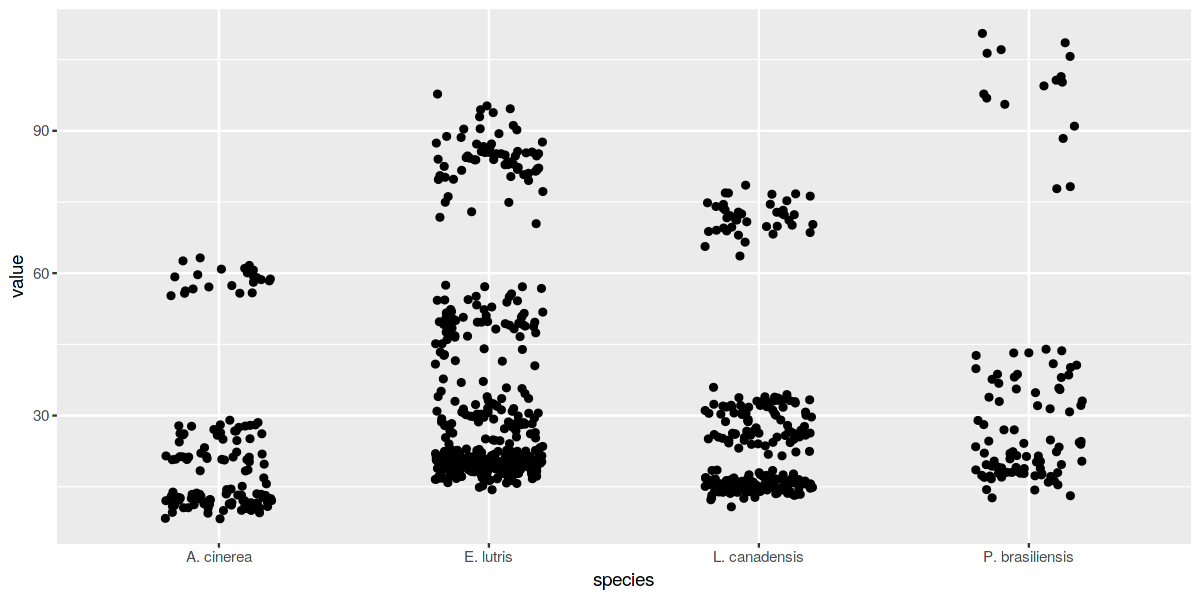

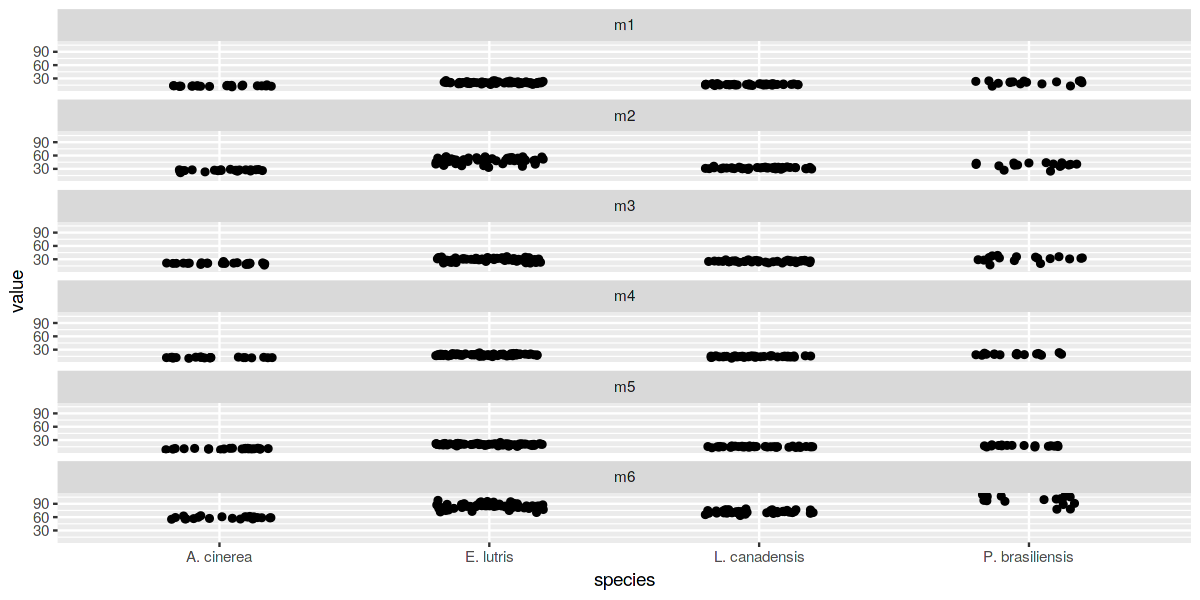

In [41]:
options(repr.plot.width=10,repr.plot.height=5)
p=ggplot(otter.data.scaled, aes(x=species, y=value)) #, color=characteristic))
p=p+geom_point(position=position_jitter(h=0,w=.2))
p
p=p+facet_wrap(~characteristic, ncol=1)#each has own independent scale
# facet_grid(characteristic ~.)
p

Make the axis test legible by rotating the text 45 degrees.

Warning message:
“Removed 5 rows containing missing values (geom_point).”


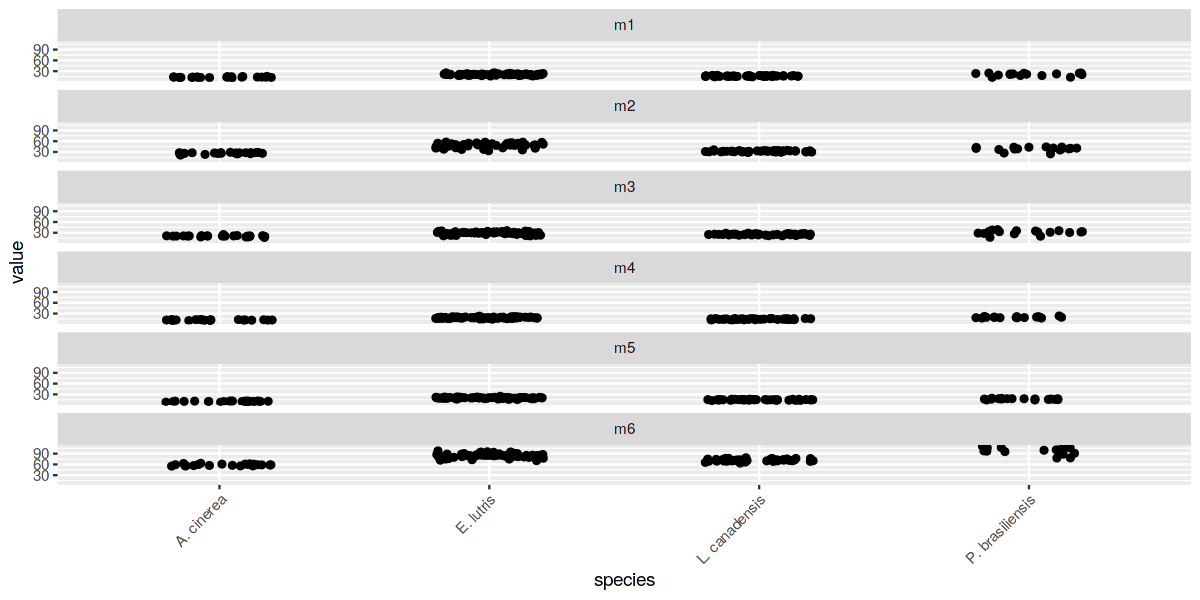

In [42]:
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

What happens if you pass the argument `scales='free_y` to `facet_wrap`?

Warning message:
“Removed 5 rows containing missing values (geom_point).”


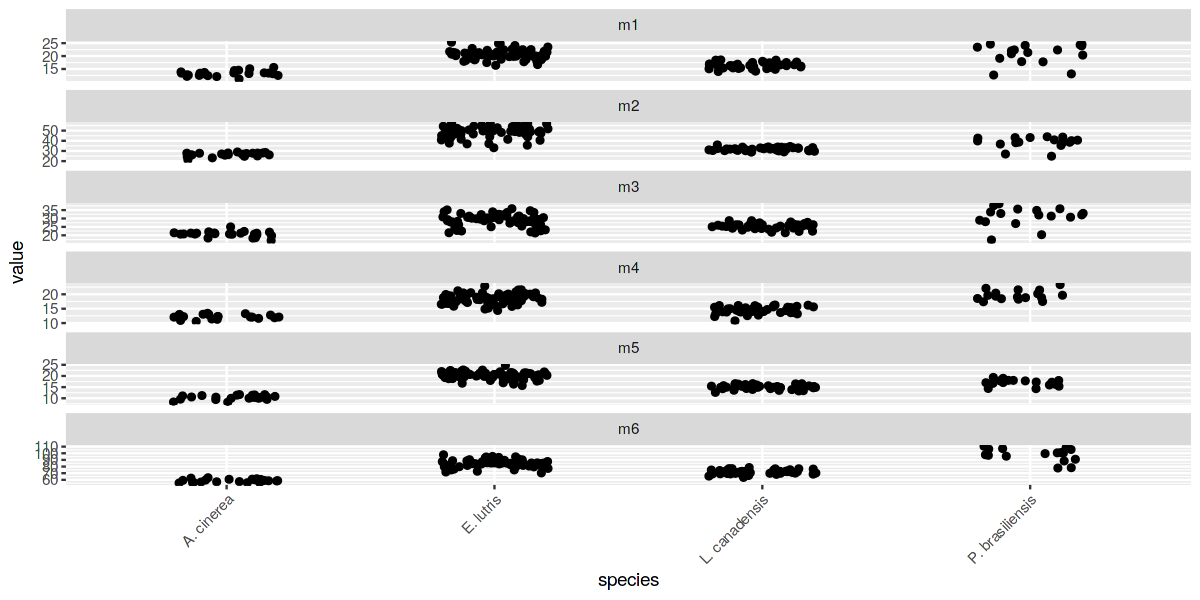

In [43]:
p=p+facet_wrap(~characteristic, ncol=1, scales='free_y')#each has own independent scale
# facet_grid(characteristic ~.)
p

Do you prefer the heatmap or the point+jitter plot?

In [ ]:
heatmap since it can show trends easier; jitter will help analyze more indepth than trends.